# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Get the  train data 

In [2]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5635,0.348365,0.061673,-0.053334,0.127036,-0.271349,-0.250435,0.027827,-0.291141,-0.286538,0.438846,...,-0.179503,0.714692,-0.511509,-0.035491,-0.847839,0.151238,-0.077499,26,3,WALKING_DOWNSTAIRS


In [3]:
train.shape

(7352, 564)

## Get the  test data 

In [4]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2742,0.292469,0.004134,-0.135669,-0.311506,-0.104494,-0.163206,-0.356012,-0.166519,-0.215821,-0.07702,...,-0.13096,-0.253434,0.891891,-0.208596,-0.694091,0.221796,0.195015,24,2,WALKING_UPSTAIRS


In [5]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

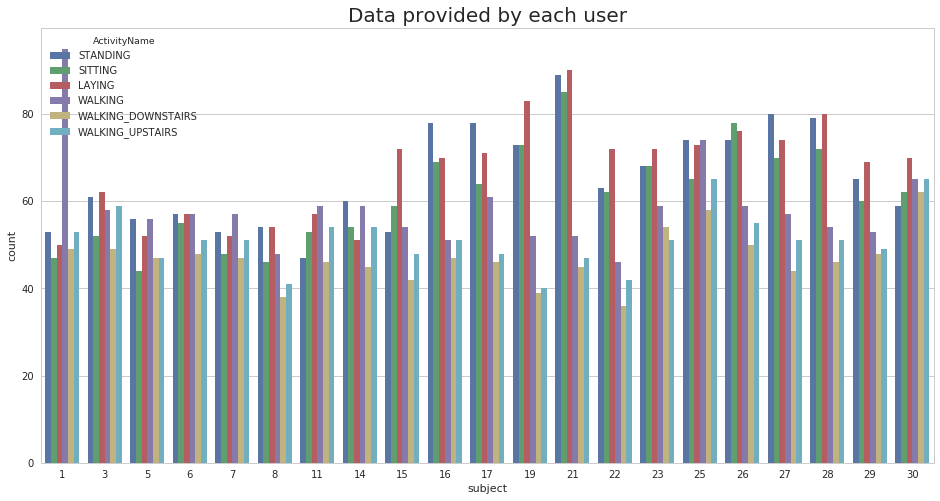

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

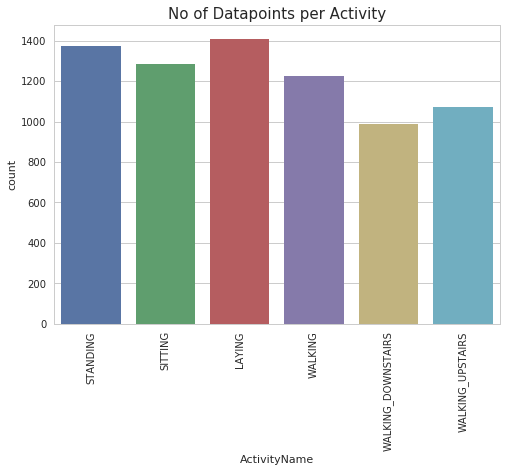

In [10]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [11]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [12]:
train.to_csv('UCI_HAR_dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge - Dirtying mind


 As we tend to learn about Accelerometer and Gyroscope and the features carefully we get following

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.


+ __Angle and Jerk variables__

    + Angle variables will be useful both in differentiating 'lying and stand'.
	+ Jerk variables are important in distinguishing walkng upstairs or downstairs.
	
    
+ __Magnitude and XYZ values__  
    
    + Magnitude represents Euclidian distance of vectors in 3 dimensions(X,Y and Z). ie.,Magnitude contains the same info as (or strongly correlated with) XYZ variables, therefore,we remove all x,y,z component variables and retain Magnitude and angle variables.
    
    
+ We ignore the band variables as we have no simple way to interpret the meaning and relate them to physical activities.

+ Mean and std are important, skewness and kurtosis may also be hence we include all these.


### 2. Stationary and Moving activities are completely different

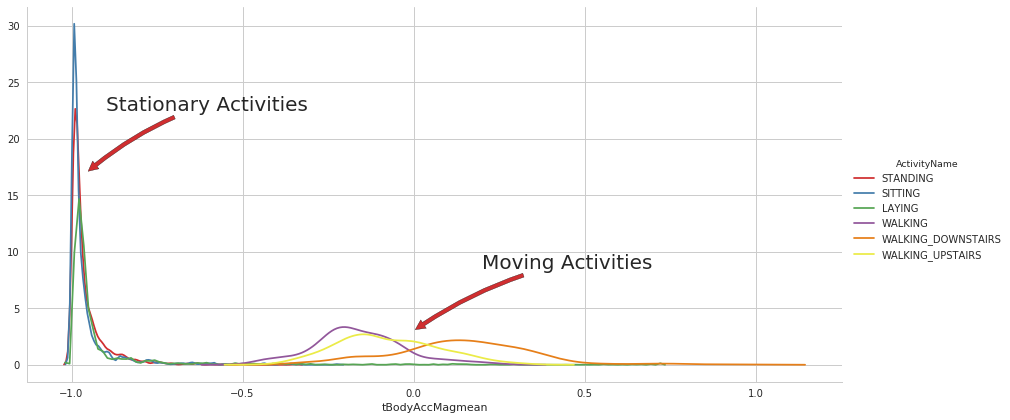

In [13]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

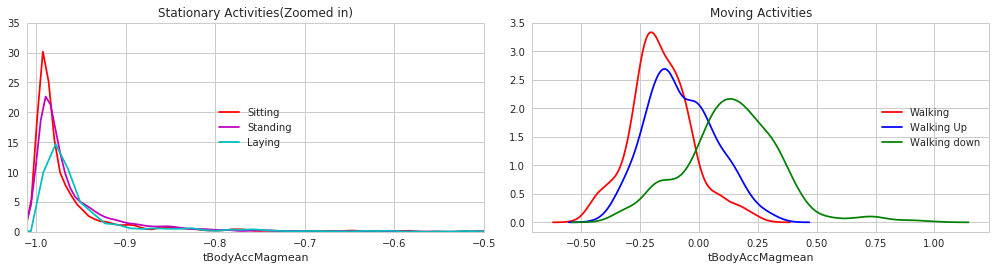

In [14]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

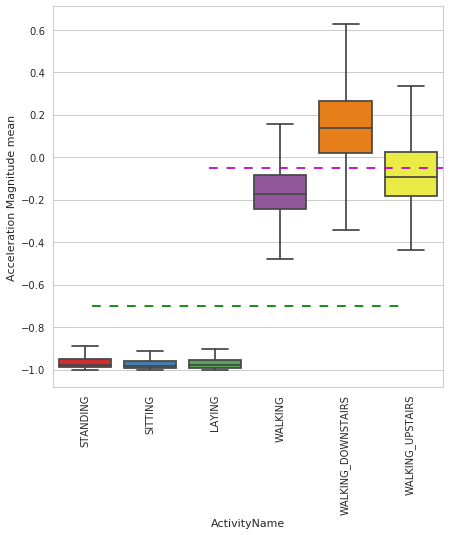

In [15]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

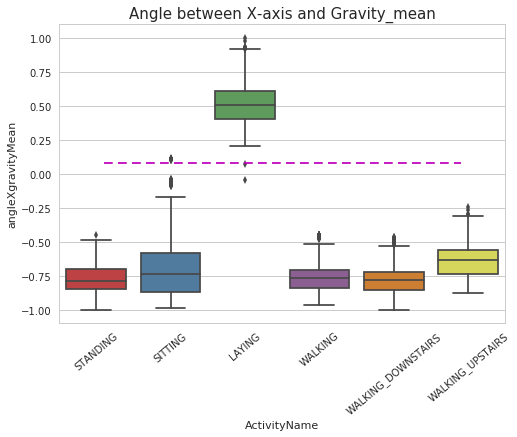

In [16]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

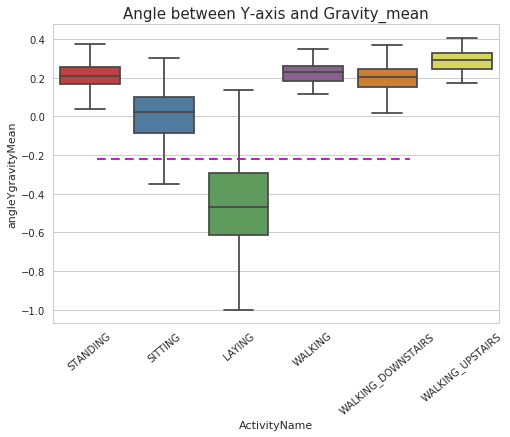

In [17]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## 5. Features that we think sufficient for this classification

In [18]:
# list of feaatures that we think 
features = ['tBodyAccMagmean','tBodyAccMagstd','tBodyAccJerkMagmean','tBodyAccJerkMagstd','tBodyGyroMagmean',
     'tBodyGyroMagstd','tBodyGyroJerkMagmean','tBodyGyroJerkMagstd','fBodyAccMagmean','fBodyAccMagstd',
     'fBodyBodyAccJerkMagmean','fBodyBodyAccJerkMagstd','fBodyBodyGyroMagmean','fBodyBodyGyroMagstd',
     'fBodyBodyGyroJerkMagmean','fBodyBodyGyroJerkMagstd','fBodyBodyGyroMagmeanFreq','fBodyBodyGyroJerkMagmeanFreq',
    'fBodyAccMagmeanFreq','fBodyBodyAccJerkMagmeanFreq','fBodyAccMagskewness','fBodyAccMagkurtosis',
    'fBodyBodyAccJerkMagskewness', 'fBodyBodyAccJerkMagkurtosis','fBodyBodyGyroMagskewness','fBodyBodyGyroMagkurtosis',
    'fBodyBodyGyroJerkMagskewness','fBodyBodyGyroJerkMagkurtosis','angletBodyAccJerkMeangravityMean','angletBodyAccMeangravity',
     'angletBodyGyroJerkMeangravityMean','angletBodyGyroMeangravityMean','angleXgravityMean',
     'angleYgravityMean','angleZgravityMean']

# 6. Justification of feature selection with LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

# train logistic regression (one vs rest)
log_reg = LogisticRegression(C = 30)
log_reg.fit(X_train.drop(['Activity', 'ActivityName', 'subject'],axis=1), y_train_labels)
predicted = log_reg.predict(X_test.drop(['Activity', 'ActivityName', 'subject'],axis=1))

# rows = labels = 6 , columns = features = 561 for weight matrix

# to change the weights to absolute values
absolute_coeff = np.absolute(log_reg.coef_)
absolute_coeff[:3]

array([[ 0.13334828,  0.00831796,  0.08203046, ...,  2.73879592,
         0.53252435,  0.23594403],
       [ 0.44683016,  1.05712604,  1.19774705, ...,  3.44528343,
         2.91386864,  0.1503546 ],
       [ 0.00661635,  1.30594933,  1.1153748 , ...,  4.25294053,
         4.47393213,  0.91348304]])

In [20]:
# get all features into one single array
all_features = X_test.drop(['Activity', 'ActivityName', 'subject'], axis=1).columns

## 6.1 Getting important features from individual labels 

### 6.1.1  Important Features  for LAYING

In [21]:
laying_coeff = absolute_coeff[0]

# store features and their weights in a dataframe
df_laying_coeff = pd.DataFrame()
df_laying_coeff['features'] = all_features
df_laying_coeff['weights'] = laying_coeff

# get all features sorted by their weights
imp_features_laying = df_laying_coeff.sort_values(by='weights', ascending=False).features

In [22]:
imp_features_laying[:3]

56    tGravityAccenergyX
52       tGravityAccminX
40      tGravityAccmeanX
Name: features, dtype: object

### 6.1.2 Important Features  for SITTING

In [23]:
sitting_coeff = absolute_coeff[1]

# store features and their weights in a dataframe
df_sitting_coeff = pd.DataFrame()
df_sitting_coeff['features'] = all_features
df_sitting_coeff['weights'] = sitting_coeff

# get all features sorted by their weights
imp_features_sitting = df_sitting_coeff.sort_values(by='weights', ascending=False).features

### 6.1.3 Important Features  for STANDING

In [24]:
standing_coeff = absolute_coeff[2]

# store features and their weights in a dataframe
df_standing_coeff = pd.DataFrame()
df_standing_coeff['features'] = all_features
df_standing_coeff['weights'] = standing_coeff

# get all features sorted by their weights
imp_features_standing= df_standing_coeff.sort_values(by='weights', ascending=False).features

### 6.1.4  Important Features  for WALKING

In [25]:
walking_coeff = absolute_coeff[3]

# store features and their weights in a dataframe
df_walking_coeff = pd.DataFrame()
df_walking_coeff['features'] = all_features
df_walking_coeff['weights'] = walking_coeff

# get all features sorted by their weights
imp_features_walking= df_walking_coeff.sort_values(by='weights', ascending=False).features

### 6.1.5 Important Features  for WALKING_DOWNSTAIRS

In [26]:
walking_down_coeff = absolute_coeff[4]

# store features and their weights in a dataframe
df_walking_down_coeff = pd.DataFrame()
df_walking_down_coeff['features'] = all_features
df_walking_down_coeff['weights'] = walking_down_coeff

# get all features sorted by their weights
imp_features_walking_down= df_walking_down_coeff.sort_values(by='weights', ascending=False).features

### 6.1.6 Important Features  for WALKING_UPSTAIRS

In [27]:
walking_up_coeff = absolute_coeff[5]

# store features and their weights in a dataframe
df_walking_up_coeff = pd.DataFrame()
df_walking_up_coeff['features'] = all_features
df_walking_up_coeff['weights'] = walking_up_coeff

# get all features sorted by their weights
imp_features_walking_up= df_walking_up_coeff.sort_values(by='weights', ascending=False).features

### 6.1.7 Analysing top 100 features from all classe labels

In [221]:
from itertools import chain

# create a set of features from all the classe labels
top_features = set(chain( imp_features_laying[:100], imp_features_sitting[:100], imp_features_standing[:100], \
                         imp_features_walking[:100], imp_features_walking_down[:100], imp_features_walking_up[:100] ))

# no of unique features from all class labels
print("\n\nWe got {} unique features from top 100 features of all classes.".format(top_features.__len__()))

print('\n\nWe got {} common features from the reduced feature set and top 100 important features from all classes\n'\
     .format(len(set(top_features).intersection(set(features)))))



We got 287 unique features from top 100 features of all classes.


We got 20 common features from the reduced feature set and top 100 important features from all classes



### 6.1.8 Common features in reduced and  top-100 feature sets 

In [211]:
# 20 common Features
print('\n\n20 Common features')
print('-------------------------')
for f in set(top_features).intersection(set(features)):
    print('{},'.format(f),end='\t')
    
print('\n\n-------------------------------------------------------')  
print('Features that we think important, but they are not in top (A/c to model)')
print('-------------------------------------------------------')
for f in set(features)-(set(top_features).intersection(set(features))):
    print('{},'.format(f),end='\t')

print('\n\n----------------------------------------------------------')  
print('Some of the Features that we missed from important features')
print('---------------------------------------------------------------')
for f in list(set(top_features)-set(features))[:50]:
    print('{},'.format(f),end='\t')



20 Common features
-------------------------
fBodyBodyAccJerkMagstd,	angletBodyGyroMeangravityMean,	angletBodyAccJerkMeangravityMean,	fBodyBodyGyroJerkMagmeanFreq,	angleXgravityMean,	fBodyAccMagmeanFreq,	angleZgravityMean,	fBodyAccMagmean,	fBodyBodyGyroMagskewness,	fBodyBodyGyroMagmeanFreq,	angleYgravityMean,	fBodyBodyGyroJerkMagskewness,	tBodyAccMagstd,	fBodyAccMagskewness,	fBodyBodyGyroJerkMagkurtosis,	tBodyGyroMagmean,	fBodyBodyAccJerkMagskewness,	fBodyAccMagstd,	fBodyBodyAccJerkMagkurtosis,	fBodyBodyAccJerkMagmeanFreq,	

-------------------------------------------------------
Features that we think important, but they are not
-------------------------------------------------------
fBodyBodyGyroMagmean,	fBodyBodyAccJerkMagmean,	tBodyGyroJerkMagmean,	fBodyBodyGyroJerkMagmean,	tBodyAccJerkMagstd,	tBodyAccJerkMagmean,	fBodyAccMagkurtosis,	tBodyGyroMagstd,	tBodyGyroJerkMagstd,	tBodyAccMagmean,	fBodyBodyGyroMagstd,	fBodyBodyGyroMagkurtosis,	fBodyBodyGyroJerkMagstd,	angletBodyGyroJerkMe

## 6.2 Getting important features by calculating feature importance from all labels 

In [135]:
# labels *(by) features matrix
print(absolute_coeff.shape)

# max_weight of each label irrespective of what the feature is
max_weight_of_labels = absolute_coeff.max(axis=1)
max_weight_of_labels

(6, 561)


array([  3.5735777 ,  20.33020615,  19.55670711,   4.13070482,
         3.7964544 ,   4.91266705])

 ### 6.2.1 For each feature : 

- Divide ___each weight__(since it has 6 different weights for 6 labels), with __max_weight__ of corresponding label
- We will get 6 new weights for this feature.(one for each label)

- WHY...?
    - By doing so, we can represent weights(for each label) that specifies, how much weight it's contributing to classify the label, when compared to the feature that can easily classify it(ie., which has maximum weight assosciated with that label)


- Sum them all
- Finally we can represent the importance of the feature with this single value

In [128]:
no_of_features = absolute_coeff.shape[1]
# combined weights for each label
weights = list()
for i in range(no_of_features):
    weights.append(float(sum(np.divide(absolute_coeff[:,i], max_weight_of_labels))))

In [139]:
# create a dataframe to store the features and new_weights together
df_imp_features = pd.DataFrame()

df_imp_features['features'] = all_features
df_imp_features['weights'] = pd.Series(weights)

# dataframe before sorting
df_imp_features.head()

,features,weights
0,tBodyAccmeanX,0.670761
1,tBodyAccmeanY,0.412404
2,tBodyAccmeanZ,0.608154
3,tBodyAccstdX,1.043332
4,tBodyAccstdY,0.561306


In [146]:
# dataframe after sorting
df_imp_features.sort_values(by='weights', ascending=False).head()

,features,weights
182,tBodyGyroJerkentropyX,2.919749
104,tBodyAccJerkentropyZ,2.542269
37,tBodyAcccorrelationXY,2.485898
197,tBodyGyroJerkcorrelationXY,2.342114
55,tGravityAccsma,2.300139


In [151]:
# get features in their descending order of their weights from this dataframe
imp_features = df_imp_features.sort_values(by='weights', ascending=False).features.values
imp_features[:5]

array(['tBodyGyroJerkentropyX', 'tBodyAccJerkentropyZ',
       'tBodyAcccorrelationXY', 'tBodyGyroJerkcorrelationXY',
       'tGravityAccsma'], dtype=object)

### 6.2.2 Comparing Our feature set with this feature set

#### Top-100 features

In [239]:
common_features = set(features).intersection(set(imp_features[:287]))
print('\nNo of common features : {}'.format(len(common_features)))
print('-------------------------')
for f in common_features:
    print('{},'.format(f),end='\t')
    
print('\n\n---------------------------------------------------------')  
print('Features that we think important, but they are not in top')
print('----------------------------------------------------------')
for f in set(features)-(common_features):
    print('{},'.format(f),end='\t')

print('\n\n----------------------------------------------------------')  
print('Some of the Features that we missed from important features')
print('---------------------------------------------------------------')
for f in list(set(imp_features)-set(features))[:50]:
    print('{},'.format(f),end='\t')


No of common features : 18
-------------------------
fBodyBodyAccJerkMagstd,	fBodyBodyGyroMagmean,	angletBodyGyroMeangravityMean,	angleXgravityMean,	fBodyAccMagmeanFreq,	fBodyAccMagmean,	fBodyBodyGyroMagskewness,	fBodyBodyGyroMagmeanFreq,	fBodyAccMagkurtosis,	angleYgravityMean,	fBodyBodyGyroJerkMagskewness,	tBodyAccMagstd,	fBodyBodyGyroJerkMagkurtosis,	fBodyAccMagskewness,	fBodyBodyAccJerkMagskewness,	fBodyAccMagstd,	fBodyBodyAccJerkMagkurtosis,	fBodyBodyAccJerkMagmeanFreq,	

---------------------------------------------------------
Features that we think important, but they are not in top
----------------------------------------------------------
fBodyBodyAccJerkMagmean,	angletBodyAccJerkMeangravityMean,	tBodyGyroJerkMagmean,	fBodyBodyGyroJerkMagmean,	fBodyBodyGyroJerkMagmeanFreq,	angleZgravityMean,	tBodyAccJerkMagstd,	tBodyAccJerkMagmean,	tBodyGyroMagmean,	tBodyGyroMagstd,	tBodyGyroJerkMagstd,	tBodyAccMagmean,	fBodyBodyGyroMagstd,	fBodyBodyGyroMagkurtosis,	fBodyBodyGyroJerkMagstd,	a

## 6.3 Above two methods are same

In [231]:
# important features from first method (one vs rest)
print('\nWe have {} important features from our first method.\n'.format(len(top_features)))
print('we will also consider top 287 features from the second method to compare them.\n')

print('Both methods got {} features in common.'.\
      format(len(set(top_features).intersection(set(imp_features[:287])))))


We have 287 important features from our first method.

we will also consider top 287 features from the second method to compare them.

Both methods got 250 features in common.


## Conclusion : 

- Both methods derived same important features (250 out of 287) 


+ Hence from feature importance using Logistic Regression, we justify the correctness of heuristic features set reduced from domain knowledge.

## 7. Justification of feature selection with Random Forest Algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [20]:
temp_X_train = train[features]
temp_X_test = test[features]

print(temp_X_train.shape, y_train_labels.shape)
print(temp_X_test.shape, y_test_labels.shape)

(7352, 35) (7352,)
(2947, 35) (2947,)


In [21]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(temp_X_train, y_train_labels)
pred = clf.predict(temp_X_test)

In [22]:
pred.shape, y_test_labels.shape

((2947,), (2947,))

In [23]:
print('Accuracy: {}'.format(metrics.accuracy_score(y_true=y_test_labels, y_pred = pred)))
cm = metrics.confusion_matrix(y_test_labels, pred)
cm

Accuracy: 0.8924329826942654


array([[537,   0,   0,   0,   0,   0],
       [  0, 403,  87,   0,   0,   1],
       [  0,  71, 460,   0,   0,   1],
       [  0,   0,   0, 472,  11,  13],
       [  0,   0,   0,  26, 338,  56],
       [  0,   0,   0,  42,   9, 420]])

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

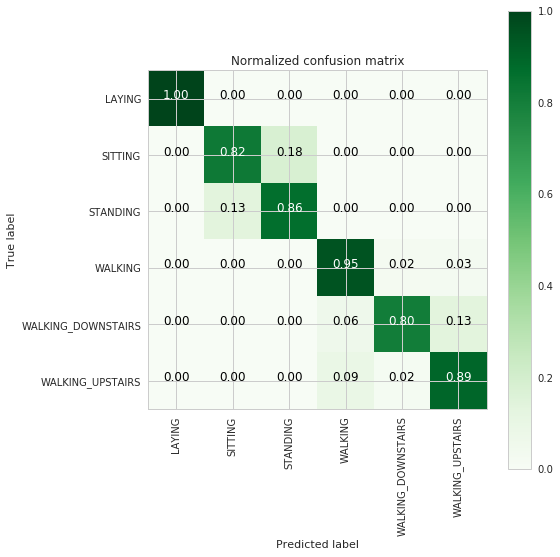

------------------------------------------------------------------------------
Classification Report : 
------------------------------------------------------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.82      0.84       491
          STANDING       0.84      0.86      0.85       532
           WALKING       0.87      0.95      0.91       496
WALKING_DOWNSTAIRS       0.94      0.80      0.87       420
  WALKING_UPSTAIRS       0.86      0.89      0.87       471

       avg / total       0.89      0.89      0.89      2947



In [27]:
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=labels,normalize=True,title='Normalized confusion matrix', cmap=plt.cm.Greens)
plt.show()

print('------------------------------------------------------------------------------')
print('Classification Report : ')
print('------------------------------------------------------------------------------')
print(metrics.classification_report(y_true=y_test_labels, y_pred=pred))

# Apply t-sne on the data 

In [27]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Iteration 25: error = 3.7637029, gradient norm = 0.0106752
[t-SNE] Iteration 50: error = 3.7336764, gradient norm = 0.0073617
[t-SNE] Iteration 75: error = 3.5454576, gradient norm = 0.0029758
[t-SNE] Iteration 100: error = 3.4886713, gradient norm = 0.0025901
[t-SNE] KL divergence afte

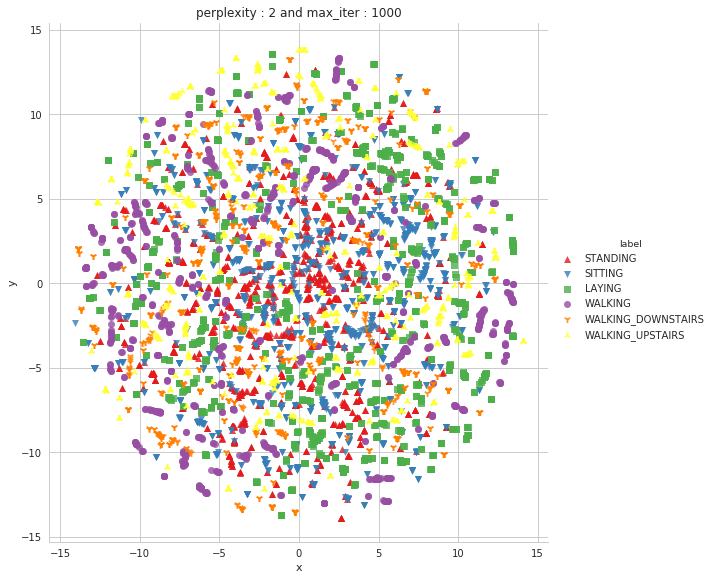

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Iteration 25: error = 3.0613539, gradient norm = 0.0091731
[t-SNE] Iteration 50: error = 3.0358756, gradient norm = 0.0075722
[t-SNE] Iteration 75: error = 2.8683944, gradient norm = 0.0028933
[t-SNE] Iteration 100: error = 2.8190782, gradient norm = 0.0025016
[t-SNE] KL divergenc

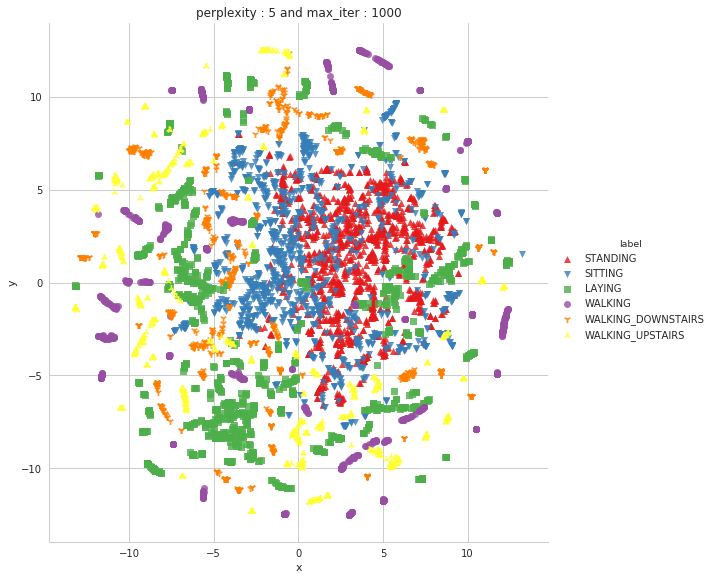

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Iteration 25: error = 2.5131989, gradient norm = 0.0076238
[t-SNE] Iteration 50: error = 2.4907219, gradient norm = 0.0078918
[t-SNE] Iteration 75: error = 2.3342764, gradient norm = 0.0028143
[t-SNE] Iteration 100: error = 2.2899039, gradient norm = 0.0024024
[t-SNE] KL divergen

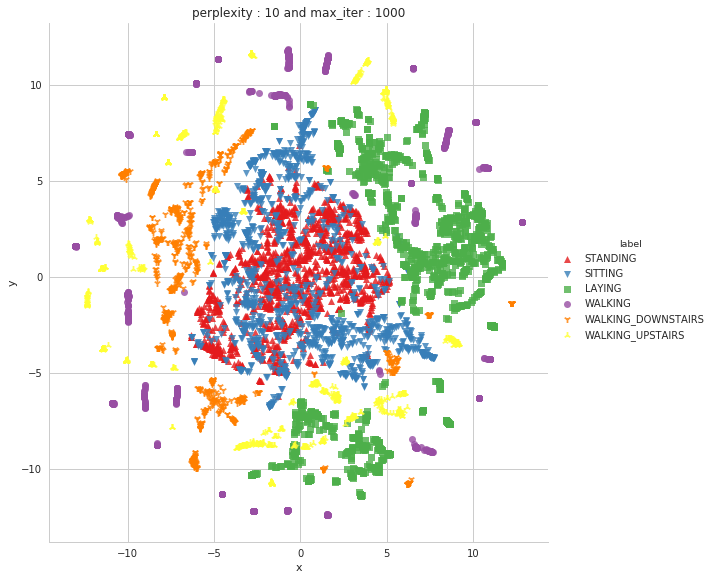

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Iteration 25: error = 1.9976934, gradient norm = 0.0069236
[t-SNE] Iteration 50: error = 1.9750187, gradient norm = 0.0082779
[t-SNE] Iteration 75: error = 1.8248385, gradient norm = 0.0026943
[t-SNE] Iteration 100: error = 1.7869359, gradient norm = 0.0022949
[t-SNE] KL divergen

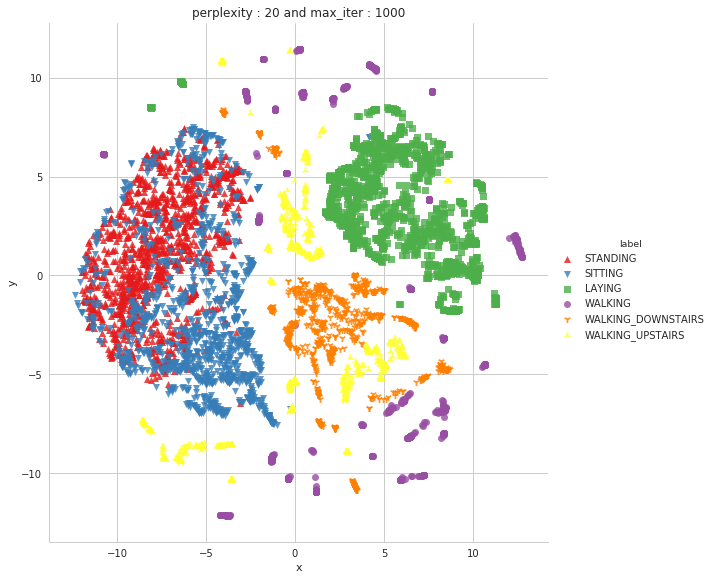

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Iteration 25: error = 1.3928983, gradient norm = 0.0042431
[t-SNE] Iteration 50: error = 1.3748441, gradient norm = 0.0086038
[t-SNE] Iteration 75: error = 1.2473177, gradient norm = 0.0024303
[t-SNE] Iteration 100: error = 1.2191983, gradient norm = 0.0020341
[t-SNE] KL diverge

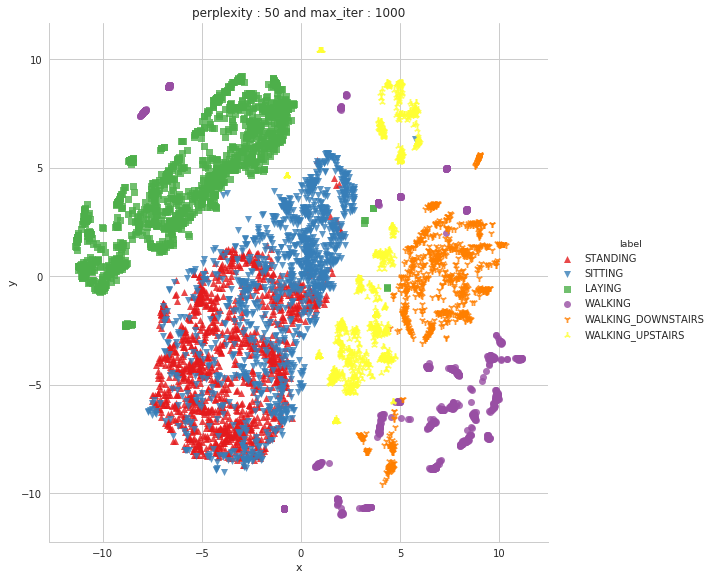

Done


In [29]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

# Conclusions : 

### Well Clustered 
- Laying Activity is clustered together, it can be classified by an hyperplane

### Overlapping Clusters but there might be an hyperplane
- Sitting and Standing are completely overlapping but, it seem that in higher dimensions it has an seperating
  hyperplane.

### Reasonably well formed Clusters
- Walking Downstairs are almost clustered at one place except a very few.

- Walking is also almost clustered together.

- Walking upstairs is distributed randomly.


### What  we could do
- It gives us an insight that linear decision boundary does not clasify the datapoints effectively.

- Non Linear decision boundaries might work well as the classification boundary between the classes looks both linear and non linear.

- We can try Logistic Regression, despite of it being good at binary classification, we can give try as baseline model, as it is super fast.

- We can also try Linear SVM.

- Random forests and GBDT will do a fair amount of good job in classifying overlapping data and multiclass situation, let's try them aswell